In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Dark Matter M31 - GADGET

In [2]:
import h5py
import rotation as rot
import time_conversion as tiempo
import barstrength as strng

#Parámetros cosmológicos
#--------------------------------------------------------------------------
h=0.732
G = 4.299e-6
a0=1.
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
#---------------------------------------------------------------------------

aa = np.loadtxt('/home/ornela/SimCLUES/redshift_outputs.txt')
aexp = aa[:,2]

snapshot=range(496,50,-1) #SNAPSHOTS

for isnap in snapshot:
    
    snap = h5py.File('/home/ornela/SimCLUES/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
    cm   = snap['subhalo_000/Center'].value
    r200 = snap['subhalo_000/R200'].value
    pdrk = snap['subhalo_000/Drk/Coordinates'].value
    mdrk = snap['subhalo_000/Drk/Masses'].value
    
    z = a0/aexp[isnap] - 1.
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
    time = tiempo.conv(z, h, omega_lambda, omega_matter)

#paso las coordenadas respecto al centro de la galaxia
    xdrk = (pdrk[:,0]-cm[0])*aexp[isnap]/h
    ydrk = (pdrk[:,1]-cm[1])*aexp[isnap]/h
    zdrk = (pdrk[:,2]-cm[2])*aexp[isnap]/h
    r = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

#------------------------------------------------
    mdrk = mdrk/h #masa a unidades físicas

    r200 = r200*aexp[isnap]/h #radio virial a unidades fisicas

    limit1 = np.where(r < 0.5)
    r_ind1 = np.argsort(r[limit1])
    
    limit2 = np.where(r < 1.0)
    r_ind2 = np.argsort(r[limit2])
    
    limit3 = np.where(r < 1.5)
    r_ind3 = np.argsort(r[limit3])

    Mc_05 = cumsum(mdrk[limit1][r_ind1])
    Mdrk_05 = Mc_05[-1]
    
    Mc_10 = cumsum(mdrk[limit2][r_ind2])
    Mdrk_10 = Mc_10[-1]
    
    Mc_15 = cumsum(mdrk[limit3][r_ind3])
    Mdrk_15 = Mc_15[-1]
    
#Guargamos los parámetros en distintos archivos
#----------------------------------------------------------------------------------
    archivo1 =  open('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/M31_Mdrk_time.dat','a')
    archivo1.write(str('%03d'%isnap) +'\t'+
            str('%12.6f'% time) +'\t'+
            str('%12.6f'% np.log10(Mdrk_05*1e10)) +'\t'+
            str('%12.6f'% np.log10(Mdrk_10*1e10)) +'\t'+
            str('%12.6f'% np.log10(Mdrk_15*1e10)) +'\n')
    archivo1.close()
#------------------------------------------------------------------------------------

# Dark Matter MW - GADGET

In [3]:
import h5py
import rotation as rot
import time_conversion as tiempo
import barstrength as strng

#Parámetros cosmológicos
#--------------------------------------------------------------------------
h=0.732
G = 4.299e-6
a0=1.
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
#---------------------------------------------------------------------------

aa = np.loadtxt('/home/ornela/SimCLUES/redshift_outputs.txt')
aexp = aa[:,2]

snapshot=range(496,50,-1) #SNAPSHOTS

for isnap in snapshot:
    
    snap = h5py.File('/home/ornela/SimCLUES/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
    cm   = snap['subhalo_001/Center'].value
    r200 = snap['subhalo_001/R200'].value
    pdrk = snap['subhalo_001/Drk/Coordinates'].value
    mdrk = snap['subhalo_001/Drk/Masses'].value
    
    z = a0/aexp[isnap] - 1.
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
    time = tiempo.conv(z, h, omega_lambda, omega_matter)

#paso las coordenadas respecto al centro de la galaxia
    xdrk = (pdrk[:,0]-cm[0])*aexp[isnap]/h
    ydrk = (pdrk[:,1]-cm[1])*aexp[isnap]/h
    zdrk = (pdrk[:,2]-cm[2])*aexp[isnap]/h
    r = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

#------------------------------------------------
    mdrk = mdrk/h #masa a unidades físicas

    r200 = r200*aexp[isnap]/h #radio virial a unidades fisicas

    limit1 = np.where(r < 0.5)
    r_ind1 = np.argsort(r[limit1])
    
    limit2 = np.where(r < 1.0)
    r_ind2 = np.argsort(r[limit2])
    
    limit3 = np.where(r < 1.5)
    r_ind3 = np.argsort(r[limit3])

    Mc_05 = cumsum(mdrk[limit1][r_ind1])
    Mdrk_05 = Mc_05[-1]
    
    Mc_10 = cumsum(mdrk[limit2][r_ind2])
    Mdrk_10 = Mc_10[-1]
    
    Mc_15 = cumsum(mdrk[limit3][r_ind3])
    Mdrk_15 = Mc_15[-1]
    
#Guargamos los parámetros en distintos archivos
#----------------------------------------------------------------------------------
    archivo1 =  open('/home/ornela/PYTHON/Barras_GdGs/Barras_Gd/_data/MW_Mdrk_time.dat','a')
    archivo1.write(str('%03d'%isnap) +'\t'+
            str('%12.6f'% time) +'\t'+
            str('%12.6f'% np.log10(Mdrk_05*1e10)) +'\t'+
            str('%12.6f'% np.log10(Mdrk_10*1e10)) +'\t'+
            str('%12.6f'% np.log10(Mdrk_15*1e10)) +'\n')
    archivo1.close()
#------------------------------------------------------------------------------------

# Dark Matter M31 - GASOLINE

In [5]:
import h5py
import rotation as rot
import barstrength as strng

#Parámetros cosmológicos
#--------------------------------------------------------------------------
G = 4.299e-6
a0=1.
#---------------------------------------------------------------------------

snapshot = np.loadtxt('/home/ornela/SimCLUES/Gasoline/snapshots.txt', dtype='string') #SNAPSHOTS
snapshot = snapshot[::-1]

for j in range(0,len(snapshot)-1):
    
    snap = h5py.File('/home/ornela/SimCLUES/Gasoline/outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')
    
    cm   = snap['subhalo_001/Center'].value
    r200 = snap['subhalo_001/R200'].value
    time = snap['subhalo_001/Time'].value
    h    = snap['subhalo_001/h'].value
    aexp = snap['subhalo_001/aexp'].value
    
    pdrk = snap['subhalo_001/Drk/Coordinates'].value
    mdrk = snap['subhalo_001/Drk/Masses'].value
    

#paso las coordenadas respecto al centro de la galaxia
    xdrk = (pdrk[:,0]-cm[0])
    ydrk = (pdrk[:,1]-cm[1])
    zdrk = (pdrk[:,2]-cm[2])
    r = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

#------------------------------------------------
    limit1 = np.where(r < 0.5)
    r_ind1 = np.argsort(r[limit1])
    
    limit2 = np.where(r < 1.0)
    r_ind2 = np.argsort(r[limit2])
    
    limit3 = np.where(r < 1.5)
    r_ind3 = np.argsort(r[limit3])

    Mc_05 = cumsum(mdrk[limit1][r_ind1])
    Mdrk_05 = Mc_05[-1]
    
    Mc_10 = cumsum(mdrk[limit2][r_ind2])
    Mdrk_10 = Mc_10[-1]
    
    Mc_15 = cumsum(mdrk[limit3][r_ind3])
    Mdrk_15 = Mc_15[-1]
    
#Guargamos los parámetros en distintos archivos
#----------------------------------------------------------------------------------
    archivo1 =  open('/home/ornela/PYTHON/Barras_GdGs/Barras_Gs/_data/M31_Mdrk_time.dat','a')
    archivo1.write(str('%s'%snapshot[j]) +'\t'+
            str('%12.6f'% time) +'\t'+
            str('%12.6f'% np.log10(Mdrk_05)) +'\t'+
            str('%12.6f'% np.log10(Mdrk_10)) +'\t'+
            str('%12.6f'% np.log10(Mdrk_15)) +'\n')
    archivo1.close()
#------------------------------------------------------------------------------------

# Dark Matter MW - GASOLINE

In [6]:
import h5py
import rotation as rot
import barstrength as strng

#Parámetros cosmológicos
#--------------------------------------------------------------------------
G = 4.299e-6
a0=1.
#---------------------------------------------------------------------------

snapshot = np.loadtxt('/home/ornela/SimCLUES/Gasoline/snapshots.txt', dtype='string') #SNAPSHOTS
snapshot = snapshot[::-1]

for j in range(0,len(snapshot)-1):
    
    snap = h5py.File('/home/ornela/SimCLUES/Gasoline/outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')
    
    cm   = snap['subhalo_002/Center'].value
    r200 = snap['subhalo_002/R200'].value
    time = snap['subhalo_002/Time'].value
    h    = snap['subhalo_002/h'].value
    aexp = snap['subhalo_002/aexp'].value
    
    pdrk = snap['subhalo_002/Drk/Coordinates'].value
    mdrk = snap['subhalo_002/Drk/Masses'].value
    

#paso las coordenadas respecto al centro de la galaxia
    xdrk = (pdrk[:,0]-cm[0])
    ydrk = (pdrk[:,1]-cm[1])
    zdrk = (pdrk[:,2]-cm[2])
    r = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

#------------------------------------------------
    limit1 = np.where(r < 0.5)
    r_ind1 = np.argsort(r[limit1])
    
    limit2 = np.where(r < 1.0)
    r_ind2 = np.argsort(r[limit2])
    
    limit3 = np.where(r < 1.5)
    r_ind3 = np.argsort(r[limit3])

    Mc_05 = cumsum(mdrk[limit1][r_ind1])
    Mdrk_05 = Mc_05[-1]
    
    Mc_10 = cumsum(mdrk[limit2][r_ind2])
    Mdrk_10 = Mc_10[-1]
    
    Mc_15 = cumsum(mdrk[limit3][r_ind3])
    Mdrk_15 = Mc_15[-1]
    
#Guargamos los parámetros en distintos archivos
#----------------------------------------------------------------------------------
    archivo1 =  open('/home/ornela/PYTHON/Barras_GdGs/Barras_Gs/_data/MW_Mdrk_time.dat','a')
    archivo1.write(str('%s'%snapshot[j]) +'\t'+
            str('%12.6f'% time) +'\t'+
            str('%12.6f'% np.log10(Mdrk_05)) +'\t'+
            str('%12.6f'% np.log10(Mdrk_10)) +'\t'+
            str('%12.6f'% np.log10(Mdrk_15)) +'\n')
    archivo1.close()

In [2]:
# path = '/home/ornela/PYTHON/'
path = '/home/omarioni/'

M31_gd = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/M31_Mdrk_time.dat')
time_M31gd   = M31_gd[:,1]
Mdrk05_M31gd = M31_gd[:,2]
Mdrk10_M31gd = M31_gd[:,3]
Mdrk15_M31gd = M31_gd[:,4]

#------------------------------------------------------------------------------------------

MW_gd = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/MW_Mdrk_time.dat')
time_MWgd   = MW_gd[:,1]
Mdrk05_MWgd = MW_gd[:,2]
Mdrk10_MWgd = MW_gd[:,3]
Mdrk15_MWgd = MW_gd[:,4]

#------------------------------------------------------------------------------------------

M31_gs = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/M31_Mdrk_time.dat')
time_M31gs   = M31_gs[:,1]
Mdrk05_M31gs = M31_gs[:,2]
Mdrk10_M31gs = M31_gs[:,3]
Mdrk15_M31gs = M31_gs[:,4]

#------------------------------------------------------------------------------------------
MW_gs = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_Mdrk_time.dat')
time_MWgs   = MW_gs[:,1]
Mdrk05_MWgs = MW_gs[:,2]
Mdrk10_MWgs = MW_gs[:,3]
Mdrk15_MWgs = MW_gs[:,4]


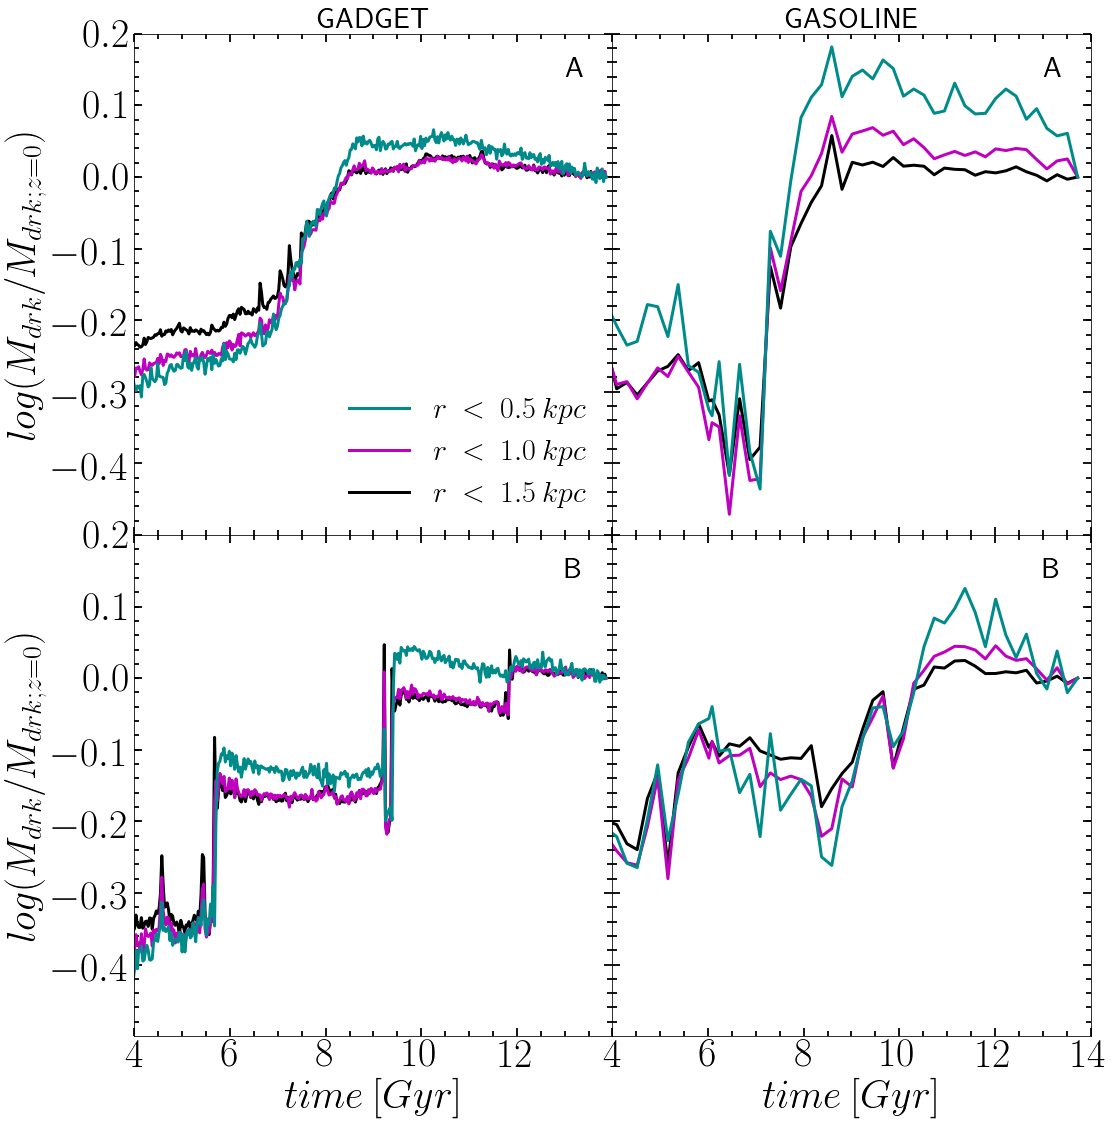

In [12]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16), sharey=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.08, left =0.12, right = 0.95, top = 0.95, wspace=0., hspace= 0)
Mdrk15, = ax[0,0].plot(time_M31gd ,Mdrk15_M31gd-Mdrk15_M31gd[0],'-', lw=3, color='k')
Mdrk10, = ax[0,0].plot(time_M31gd ,Mdrk10_M31gd-Mdrk10_M31gd[0],'-', lw=3, color='m')
Mdrk05, = ax[0,0].plot(time_M31gd ,Mdrk05_M31gd-Mdrk05_M31gd[0],'-', lw=3, color='darkcyan')


# ax[0,0].plot(time_M31gd2 ,A2max_M31gd2,'-', lw=3, color='r')
ax[0,0].set_ylabel(r'$log(M_{drk}/M_{drk;z=0})$', fontsize=40)
ax[0,0].set_xticks([4,6,8,10,12])
ax[0,0].set_xticklabels([])
ax[0,0].set_yticks([-0.4,-0.3,-0.2,-0.1,0,0.1,0.2])
ax[0,0].set_ylim(-0.5,0.2)
ax[0,0].set_xlim(4,14)
ax[0,0].minorticks_on()
ax[0,0].tick_params( labelsize=40)
ax[0,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[0,0].set_title('GADGET', loc='center', fontsize=30)
ax[0,0].text(13, 0.15, 'A', fontsize=30, color='k', ha='left', va='center')
ax[0,0].legend([Mdrk05, Mdrk10, Mdrk15],[r'$r\:<\:0.5\:kpc$', r'$r\:<\:1.0\:kpc$', r'$r\:<\:1.5\:kpc$'],fontsize=30, frameon=False, loc=4)

#------------------------------------------------------

# ax2=fig.add_subplot(222)
ax[0,1].plot(time_M31gs ,Mdrk15_M31gs-Mdrk15_M31gs[0],'-', lw=3, color='k')
ax[0,1].plot(time_M31gs ,Mdrk10_M31gs-Mdrk10_M31gs[0],'-', lw=3, color='m')
ax[0,1].plot(time_M31gs ,Mdrk05_M31gs-Mdrk05_M31gs[0],'-', lw=3, color='darkcyan')
# ax[0,1].plot(time_M31gs2 ,A2max_M31gs2,'-',lw=3, color='r')
ax[0,1].set_xticks([4,6,8,10,12,14])
ax[0,1].set_xticklabels([])
# ax[0,1].set_yticks([0,1,2,3,4])
# ax[0,1].set_yticklabels([])
# ax[0,1].set_ylim(0,4)
ax[0,1].set_xlim(4,14)
ax[0,1].minorticks_on()
ax[0,1].tick_params( labelsize=40)
ax[0,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[0,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')
ax[0,1].set_title('GASOLINE', loc='center', fontsize=30)
ax[0,1].text(13, 0.15, 'A', fontsize=30, color='k', ha='left', va='center')

# # #---------------------------------------------------------

# ax3=fig.add_subplot(223)
ax[1,0].plot(time_MWgd ,Mdrk15_MWgd-Mdrk15_MWgd[0],'-', lw=3, color='k')
ax[1,0].plot(time_MWgd ,Mdrk10_MWgd-Mdrk10_MWgd[0],'-', lw=3, color='m')
ax[1,0].plot(time_MWgd ,Mdrk05_MWgd-Mdrk05_MWgd[0],'-', lw=3, color='darkcyan')
ax[1,0].set_xticks([4,6,8,10,12])
# ax[1,0].set_xticklabels([])
# ax[1,0].set_yticks([0,1,2,3])
# ax[0,1].set_yticklabels([])
ax[1,0].set_ylabel(r'$log(M_{drk}/M_{drk;z=0})$', fontsize=40)
ax[1,0].set_xlabel(r'$time\:[Gyr]$', fontsize=40)
ax[1,0].set_xlim(4,14)
# ax[1,0].set_ylim(0,4)
ax[1,0].minorticks_on()
ax[1,0].tick_params( labelsize=40)
ax[1,0].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,0].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')

ax[1,0].text(13, 0.15, 'B', fontsize=30, color='k',ha='left', va='center')


# # #---------------------------------------------------------------------------------------
# # ax4=fig.add_subplot(224)
ax[1,1].plot(time_MWgs ,Mdrk15_MWgs-Mdrk15_MWgs[0],'-', lw=3, color='k')
ax[1,1].plot(time_MWgs ,Mdrk10_MWgs-Mdrk10_MWgs[0],'-', lw=3, color='m')
ax[1,1].plot(time_MWgs ,Mdrk05_MWgs-Mdrk05_MWgs[0],'-', lw=3, color='darkcyan')
# ax[1,1].plot(time_MWgs2 ,A2max_MWgs2,'-', lw=3, color='r')
ax[1,1].set_xticks([4,6,8,10,12,14])
# ax[1,1].set_yticks([0,1,2,3])
# ax[1,1].set_yticklabels([])
ax[1,1].set_xlabel(r'$time\:[Gyr]$', fontsize=40)
ax[1,1].set_xlim(4,14)
# ax[1,1].set_ylim(0,4)
ax[1,1].minorticks_on()
ax[1,1].tick_params( labelsize=40)
ax[1,1].tick_params('both', length=5, width=1.8,which='minor', direction='in', right='on',top='on')
ax[1,1].tick_params('both', length=8, width=1.8,which='major', direction='in', right='on',top='on')

ax[1,1].text(13, 0.15, 'B', fontsize=30, color='k', ha='left', va='center')

# fig.savefig('/home/ornela/overleaf/13216980csjxswjndpmj/Mdrk_time.pdf', dpi = 100, xxbox_inches='tight')
fig.savefig('/home/omarioni/Barras_GdGs/Barras_Gd/_imagenes/Mdrk_time.pdf', dpi = 100, xxbox_inches='tight')

plt.show()